In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
data_path = "/content/drive/MyDrive/산데과"
data_list = os.listdir(data_path)
iris = pd.read_csv(data_path +"/"+data_list[0])
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
species = iris['Species'].value_counts().index
seto = iris[iris['Species']==species[0]]
vir = iris[iris['Species']==species[1]]
ver = iris[iris['Species']==species[2]]

# boxplot

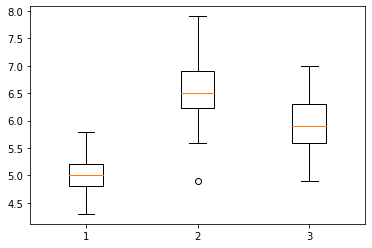

In [ ]:
data = [seto,vir,ver]
data_sepal=[]
for i in data:
  data_sepal.append(i['SepalLengthCm'])

plt.boxplot(data_sepal)
plt.show()

# t-test

In [ ]:
for i in range(3):
  if i==2:
    a=0
  else:
    a=i+1
  statistic,p_value = scipy.stats.ttest_ind(data_sepal[i],data_sepal[a])
  if p_value < 0.05:
    print("p_value:{} 가설기각:{}".format(p_value,p_value<0.05))
    print("가설이 기각되었으므로 {}와{}는 유의미한 차이가 있다".format(species[i],species[a]))
  else:
    print("p_value:{} 가설기각:{}".format(p_value,p_value<0.05))
    print("가설이 기각되지 않았으므로 {}와{}는 유의미한 차이가 없다".format(species[i],species[a]))
    

p_value:6.892546060674059e-28 가설기각:True
가설이 기각되었으므로 Iris-setosa와Iris-virginica는 유의미한 차이가 있다
p_value:1.7248563024547942e-07 가설기각:True
가설이 기각되었으므로 Iris-virginica와Iris-versicolor는 유의미한 차이가 있다
p_value:8.985235037487079e-18 가설기각:True
가설이 기각되었으므로 Iris-versicolor와Iris-setosa는 유의미한 차이가 있다


# scatter plot

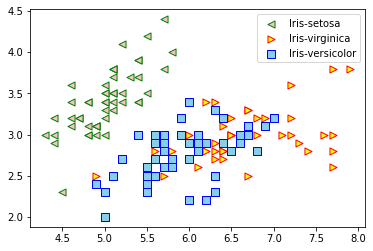

In [ ]:
data = []
labels = []
species = list(iris["Species"].value_counts().index)

for i in species:
  data.append(iris[iris["Species"]==i])
  labels.append(i)

color = ["pink","yellow","skyblue"]
edgecolor = ["green","red","blue"]
marker = ["<",">","s"]
a=0

for i in data:
  plt.scatter(i["SepalLengthCm"],i["SepalWidthCm"],marker=marker[a],c=color[a],edgecolor=edgecolor[a],s=50)
  a+=1

plt.legend(labels)
plt.show()